# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

**The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.**  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_position = np.array([5., 0., 10.])
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_position)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

<center>
Pose information (x, y, z positions and alpha, phi, psi euclidian angles)

<img src='eucl_angles.png'/>

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('data.txt', sep=',').tail()

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- **Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.**  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  **For the sample task, we only work with the 6-dimensional pose information.**  To set the size of the state (`state_size`), we must take action repeats into account.  
- **The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`)**. You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  **The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.**

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 40.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

reward_labels = ['episode', 'reward']
reward_dict = {x: [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    reward_dict['episode'].append(i_episode)
    reward_dict['reward'].append(agent.best_score)
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [2]:
import sys
import csv
import numpy as np
from agent import DDPG
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 100.])

task = Task(target_pos=target_pos)
best_score = (-100000)
file_output = 'positions.txt'

reward_labels = ['episode', 'reward']
reward_dict = {x: [] for x in reward_labels}

labels = ['episode', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi']
results = {x : [] for x in labels}


agent = DDPG(task)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new
    score = 0
        
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        if i_episode % 100 == 0 or i_episode == 2:
            to_write = [i_episode] + [task.sim.time] + list(task.sim.pose)
            for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                            
        agent.step(action, reward, next_state, done)
        
        state = next_state
        score += reward
        best_score = max(best_score, score)
        # Stop Episode if the agent reach the target
        if task.sim.pose[2] >= target_pos[2]:
            print(
            "\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})- ##TR##)"\
                .format(
                i_episode, score, best_score),
                end="")
            break
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})"
                .format(
                i_episode, score, best_score),
                end="")  # [debug]
            break          
    reward_dict['episode'].append(i_episode)
    reward_dict['reward'].append(score)
    sys.stdout.flush()

Episode =  500, score = 814.914 (best = 827.058)- ##TR##)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

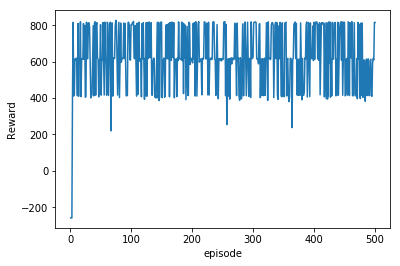

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(reward_dict['episode'], reward_dict['reward'])
plt.xlabel('episode')
plt.ylabel('Reward')
plt.savefig("reward.png")

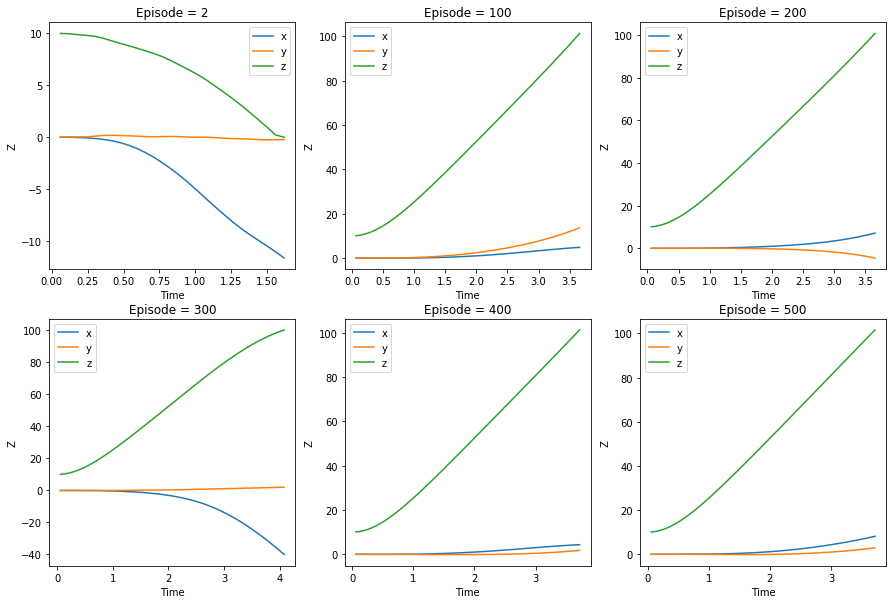

In [6]:
import pandas as pd
df_results = pd.DataFrame(results)

fig, axes = plt.subplots(figsize=(15,10),nrows=2, ncols=3)

for idx, episode in enumerate(df_results['episode'].unique()): 
    ax = axes[int(idx/3), idx%3]
    
    ax.plot(df_results[df_results['episode']==episode]['time'], 
            df_results[df_results['episode']==episode]['x'], label='x')
    
    ax.plot(df_results[df_results['episode']==episode]['time'], 
            df_results[df_results['episode']==episode]['y'], label='y')
    
    ax.plot(df_results[df_results['episode']==episode]['time'], 
            df_results[df_results['episode']==episode]['z'], label='z')
    
    ax.legend()
    ax.set_title(f'Episode = {episode}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Z')

plt.savefig("positions.png")

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The reward function was specified following three conditions:
- For reward function that discounts the current positon (x, y, z) from the target position was applied a function`np.tanh` in order to normalize the rewards between -1 and 1. With this normalization the NN should better learn the gradients. 

- A new reward value was applied if the quadcopter crashes. In this case, a reward of -100 it's added to the current reward.

- In last condition, if the quadcopter reaches the target (in this case, for tha takeoff task) the agent receives a big reward (+200). 

The reward for crashes and success it's named terminal rewards. That is, the reward for the terminal states.


**Expected behavior of the model:**

In the first few episodes the agent will explore the environment. Since he does not exactly understand his goal, the reward functions will return negative values for when he does not reach the goal. Even if it does not fall, the reward will be negative since the reward function discounts the current position of the target position. But as it approaches the target, this function tends to be "less negative." If it falls, the terminal reward value decreases by an addition of -100. All of these experiments (Action, state, reward, next_state) are stored in the buffer and are rescued each episode randomly in a quantity of bach_size.

The same is true for when the agent reaches the target, and his reward is positive. As the agent begins to hit the target, the "good experiences" are also stored in the buffer. As the episodes occur, the agent tends to choose good actions (less exploration, more exploitation), since its reward will be greater (in addition, more "good experiences" are stored in the buffer) and then the agent learns to fly.

The agent is guided by the reward (its objective is to maximize the expected reward). Thus, the reward function is very important to the learning process.

**In this case the initial position is x=0, y=0, z=10 and the final position (target) is x=0, y=0, z=100**

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

The learning algorithm used in this project was the Deep Determinist Policy Gradients (DDPG), the same provided by the udacity. It's the most recomended once the action space is continuous.

The final parameters were:
- Agent: {Gamma:  0.95; Tau: 0.3; mu: 0 theta: 0.15; sigma: 0.2; batch_size: 80}
- The learnin rate for the Actor and Critic: 0.95
- The neural network used was the default provided by udacity. But in the task algorithm another condition for break the episode was applied: if the agent reach the target value, end the episode. In fact, this condition seems help the agent "understand" what is its objective.

**Layers description**:
- Actor: for the actor was used 3 hidden layers. The hidden layers was consist of a sequence of: first layer (size=32), second layer (size=64) and third layer (size=32).

- Agent: for the agent was used 4 layers. Two hidden layers for the **state**: Layer 1 (size=32); Layer 2 (size=64); Two hidden layers for the **action**: Layer 1 (size=32) and Layer 2 (size=64).


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The results of reward for each episode and the quadcopter positions are shown in the figures above.

<img src='reward.png'>
<img src='positions.png'>


Apparently, using these parameters is relatively easy for the agent learn how to takeoff and reaches the target value (z=100), once the optimal policy is learned by the agente in the initial episodes. As can be seen, the agent reach the target value for the first time in the initial episodes (around 10~20). In the remaining episodes, the agent swings around the target and many times consecutively reaching the target value or getting close to it. The fact that sometimes the agent does not reach the target may be related to the fact that it accesses the replay buffer and selects random samples. Since this memory has limited size, good actions may have been discarded, or because the memories are chosen randomly, not so good actions can also be selected. These conditions may lead the agent to "forget" for a moment what he had learned (take off).

As can be seen, there was an Aha moment, when the agent reaches the target for the first time, and in the remaining episodes, swings around the target.

The final performance of the agent can be considered good, since the mean rewards is around 600. and in the last episode the reward was 800. In addition, the final positions of the agent in episode 500 show that the agent reaches the target and holds stable positions on the x-axis and y-axis.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

For me, the hardest part of the project was understand the DDPG algorithm, how the parameters are correlated and how they affect the quadcopter performance. In addition, the reward function modeling was hard too, and i figure out that it's one of the principal factor for the agent learn how to flight.


There is something intersting (or maybe weird) in how the agent learn. In this case, using these parameters the agent learn fast how to fly. It reaches the target in the first 10~20 episodes and in the remaining episodes reach the target or sometimes swinging around it. But sometimes, if the agent not reach the target in the first few episodes, the agent seems to be stuck in a state and never leaves. But, i'm really don't know if it's somenthing related to the parameters or if it's something with my computer (it seems that the computer don't clean the cache memory ou something like this every time i start a simulation)